# 6.6 Sourcing & Analyzing Time-Series  Adidas Data¶


## This script contains the following:
Importing your libraries and data

Subsetting, wrangling, and cleaning time-series data

Time series analysis: decomposition

Testing for stationarity

Stationarizing the Adidas Data

1. Importing your libraries and data



In [1]:
def install(package):
    # not all modules are supported out of the box in the container image, but we can install in the
    # user space quite quickly
    import os
    os.environ['PIP_ROOT_USER_ACTION'] = 'ignore'
    os.environ['SETUPTOOLS_USE_DISTUTILS'] = 'stdlib'
    import pip._internal.cli.main as main
    main.main(['install', '-q', '--disable-pip-version-check', package])


In [2]:
install('quandl')
install('statsmodels')
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

/root/venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
path = Path("C:/", "Users", "nayla", "Desktop", "Carrer F", "Curso de inmersion", "Unidad 6")

In [ ]:
data = pd.read_csv( 
    path.joinpath('02 data', 'Adidas_US_Sales-clean.csv'), index_col=0, sep=",")

In [4]:
data.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,2020-05-01,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store


In [5]:
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])


In [6]:
data.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,Foot Locker,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,Foot Locker,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,Foot Locker,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,Foot Locker,2020-05-01,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store


In [7]:
# Create a subset  from the data.
df=data
df=data.iloc[:,[1,8]]

In [8]:
df.head()

,Invoice Date,Total Sales
0,2020-01-01,600000
1,2020-02-01,500000
2,2020-03-01,400000
3,2020-04-01,382500
4,2020-05-01,540000


In [9]:
df = df.groupby(by=['Invoice Date']).sum().reset_index()

In [10]:
df.head()


,Invoice Date,Total Sales
0,2020-01-01,845141
1,2020-01-02,914122
2,2020-01-03,237739
3,2020-01-04,197440
4,2020-01-05,925566


In [11]:
df.size

1448

In [12]:
df.set_index(keys=['Invoice Date'], drop=True, inplace=True)


In [13]:
df.head()


,Total Sales
Invoice Date,
2020-01-01,845141
2020-01-02,914122
2020-01-03,237739
2020-01-04,197440
2020-01-05,925566


In [14]:
df.sort_values(by='Invoice Date', axis=0, inplace=True)

## Create a line chart of your data.

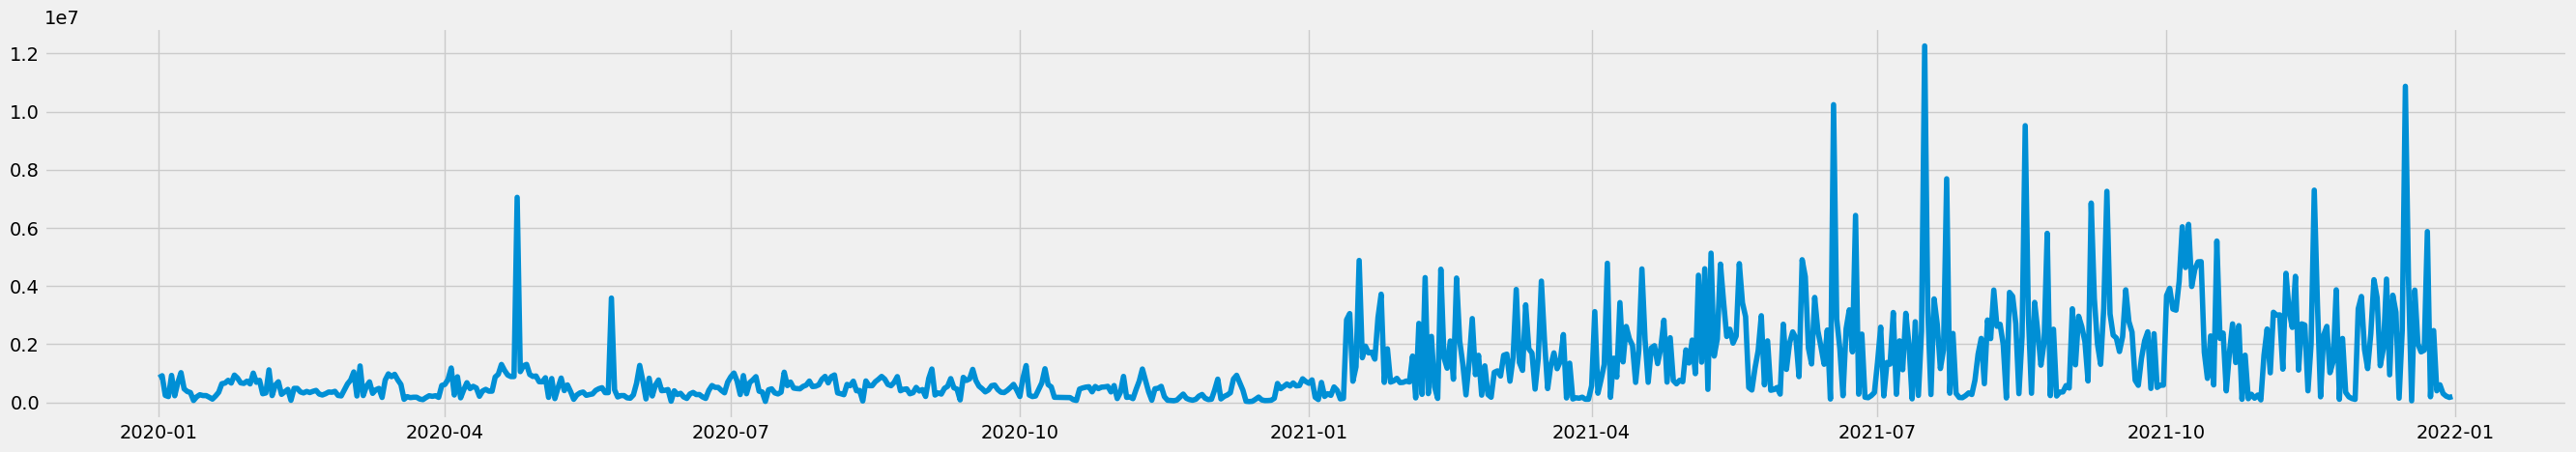

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(30,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

We have too many datapoints, let's try to summarize

In [16]:
df=data.iloc[:,[1,8]]
df=df.groupby(by=pd.Grouper(key='Invoice Date', freq='D', sort=True)).sum().reset_index()
df.set_index(keys=['Invoice Date'], drop=True, inplace=True)
df.head()
Bonusdf=df

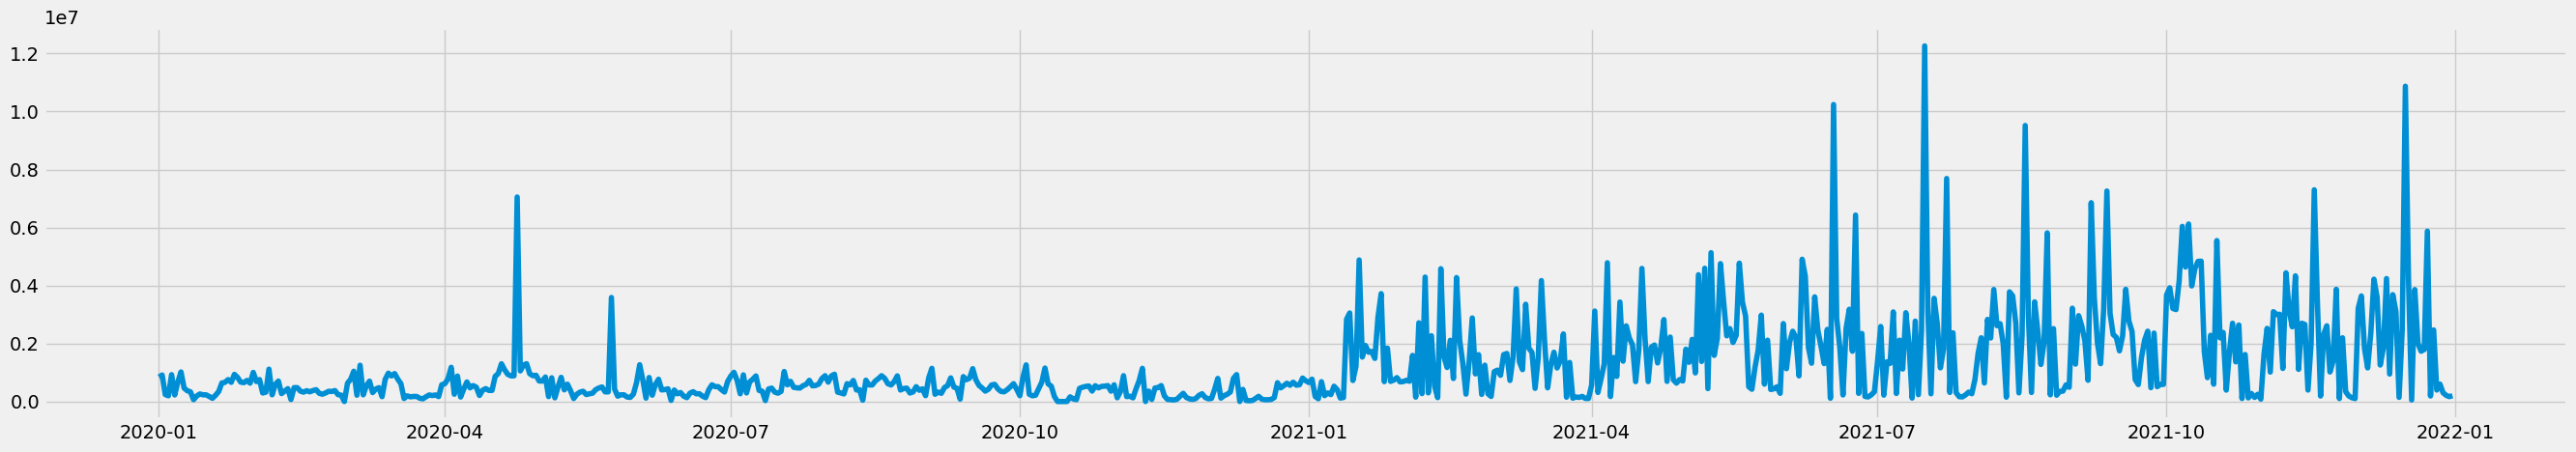

In [17]:
plt.figure(figsize=(30,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

## 5. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

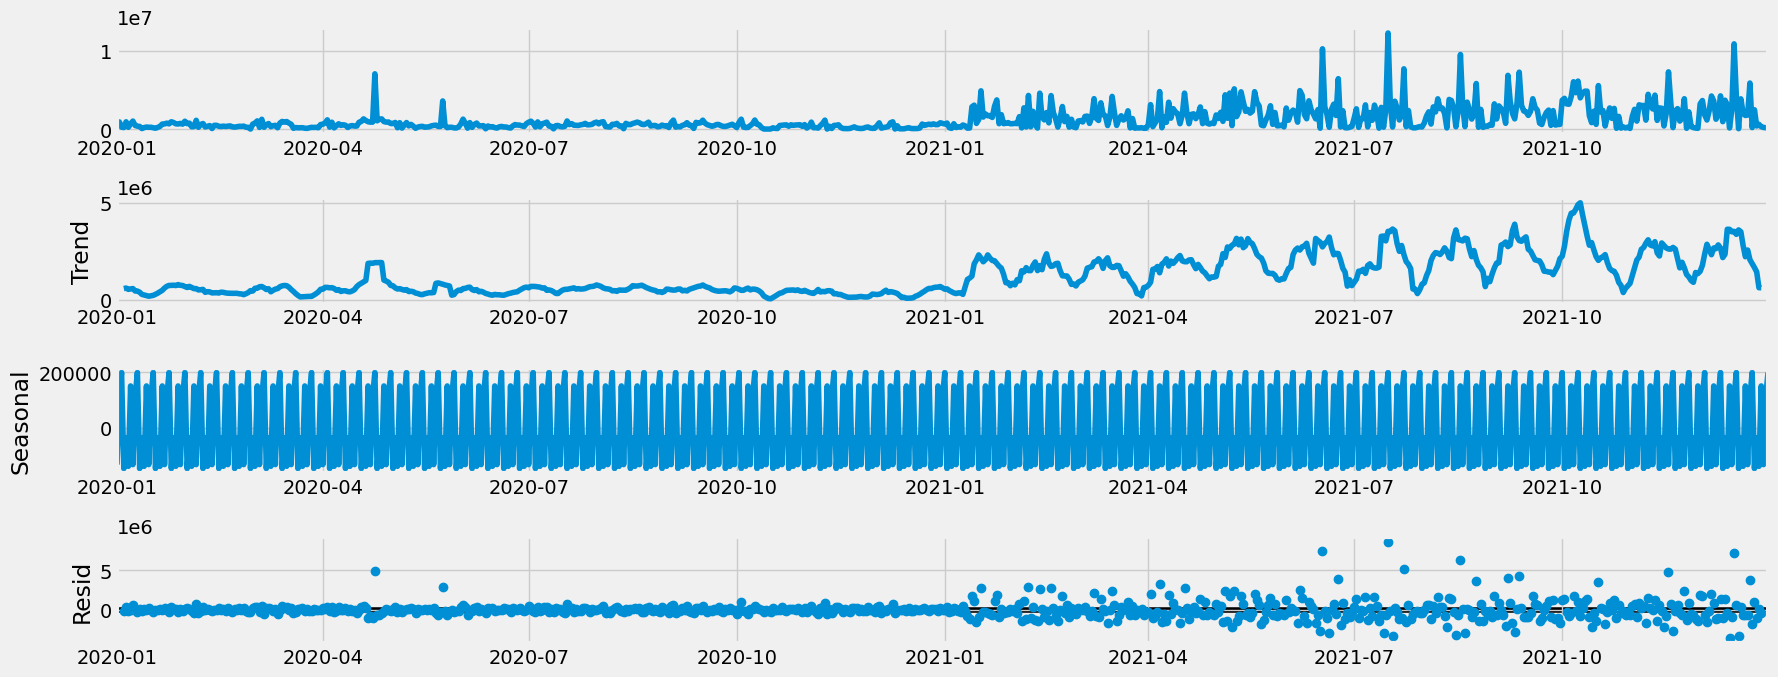

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

we carry out a linear decomposition but we believe that our data behaves more exponentially so we carry out a non-linear decomposition.

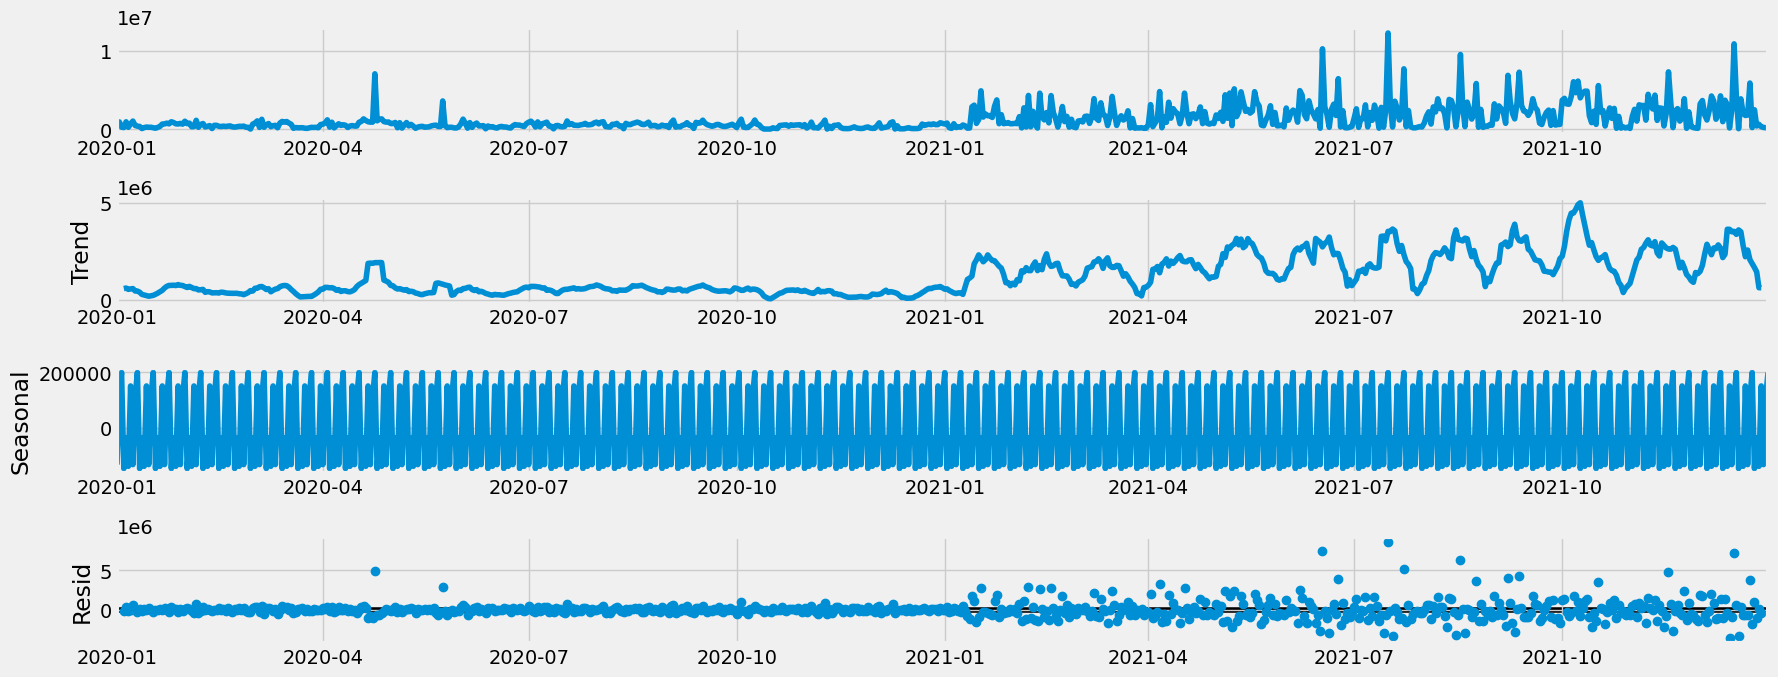

In [21]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

### The first graph we see is the data itself with all its components, called the level.
### The second graph is the trend in this graph you see an increasing trend. The influence on sales throughout 2020 due to the coronavirus is clearly observed, and sales rise in 2021 when all the shops are open again.
### The third component is seasonality. a peak is observed for the middle of the year and after that it begins to decrease until it reaches its lowest point in the last days of the year.
### And finally we see in the last graph the noise. and there is too much noise.


## 6. Testing for stationarity

### Hipotesis nula: Los datos son no estacionarios
### Hipotesis alterna: Los datos son estacionarios

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['Total Sales'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.875852
p-value                          0.002220
Number of Lags Used             14.000000
Number of Observations Used    716.000000
Critical Value (1%)             -3.439516
Critical Value (5%)             -2.865585
Critical Value (10%)            -2.568924
dtype: float64


### Test Statistics= -3.88 < Critical value=-2.87
### significance level = -2.87
### The null hypothesis is rejected
### The data is stationary

In [23]:
test=df[df.index.to_series().between('2021-10-31', '2022-01-01')]
test_plot = test.reset_index()

In [24]:
DeepnoteChart(test_plot, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":"ascending","type":"temporal","field":"Invoice Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Total Sales","scale":{"type":"linear","zero":false}}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":"ascending","type":"temporal","field":"Invoice Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Total Sales","scale":{"type":"linear","zero":false}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [25]:
train = df[df.index.to_series().between('2021-01-31', '2021-10-30')]
train_plot = train.reset_index()

In [26]:
DeepnoteChart(train_plot, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"sort":"ascending","type":"temporal","field":"Invoice Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Total Sales","scale":{"type":"linear","zero":false}}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"sort":"ascending","type":"temporal","field":"Invoice Date","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Total Sales","scale":{"type":"linear","zero":false}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

In [27]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

params = None
lowest = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train, order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit(disp=False)
            if not lowest or results.aic < lowest:
                lowest = results.aic
                params = (param, param_seasonal)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

print('best fit ARIMA{}x{}12 - AIC:{}'.format(params[0], params[1], lowest))



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8821.944114641567
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8398.094528274585
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8427.957443963176
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7914.172779043869
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8391.099597897042
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8272.86179088414
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7984.316852370373
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7897.263501564944
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8726.938944464326
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8322.953084607529
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8385.73263754016
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7890.442595647242
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8378.561061248904
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8273.630154527269
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7996.681116220101
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7890.3933873049045
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8713.98911163532
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8326.987566160617
ARIMA(0, 1, 

In [28]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=False)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0139      0.192     -0.073      0.942      -0.390       0.362
ma.L1         -0.7982      0.110     -7.285      0.000      -1.013      -0.583
ma.S.L12      -0.9991      0.036    -27.756      0.000      -1.070      -0.929
sigma2      6.898e+12   1.36e-14   5.08e+26      0.000     6.9e+12     6.9e+12


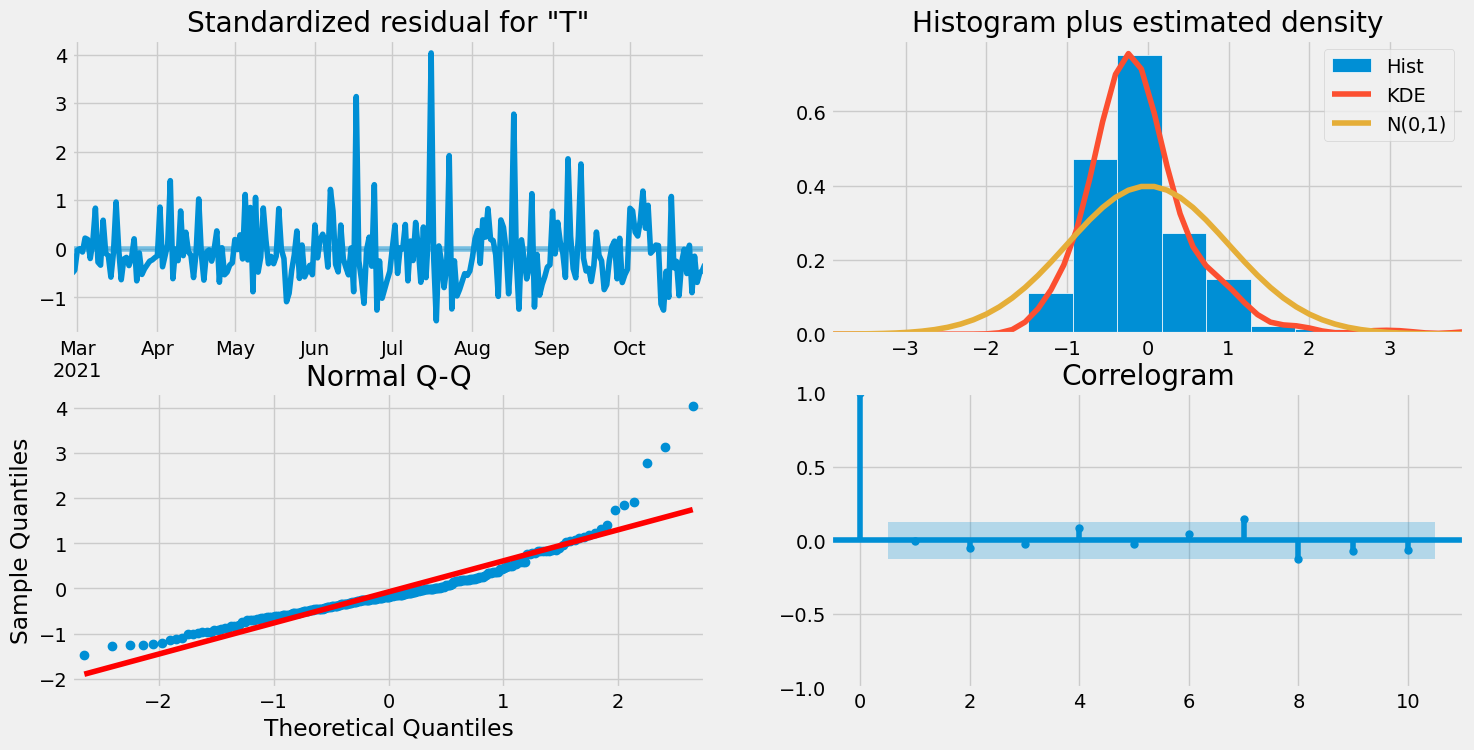

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

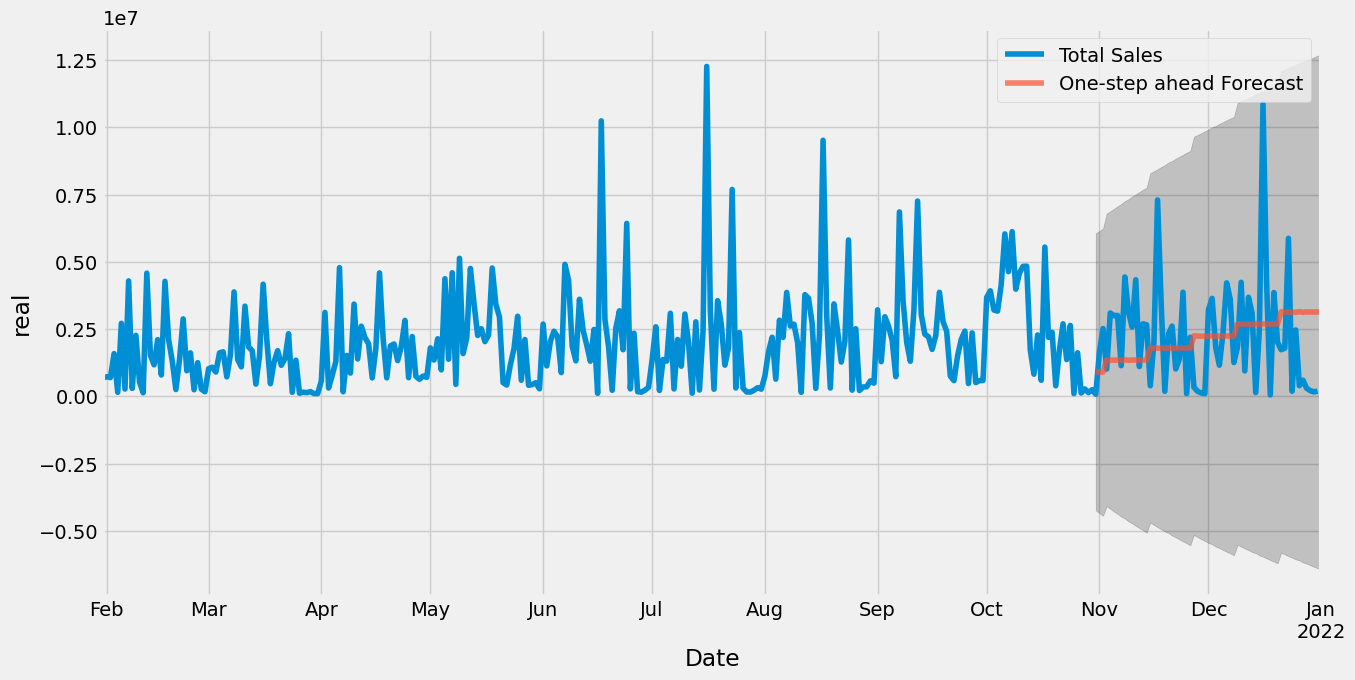

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-31'), end=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2021-01-31':].plot(label='data')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('real')
#dx.set_xlabel('real')
plt.legend()
plt.show()

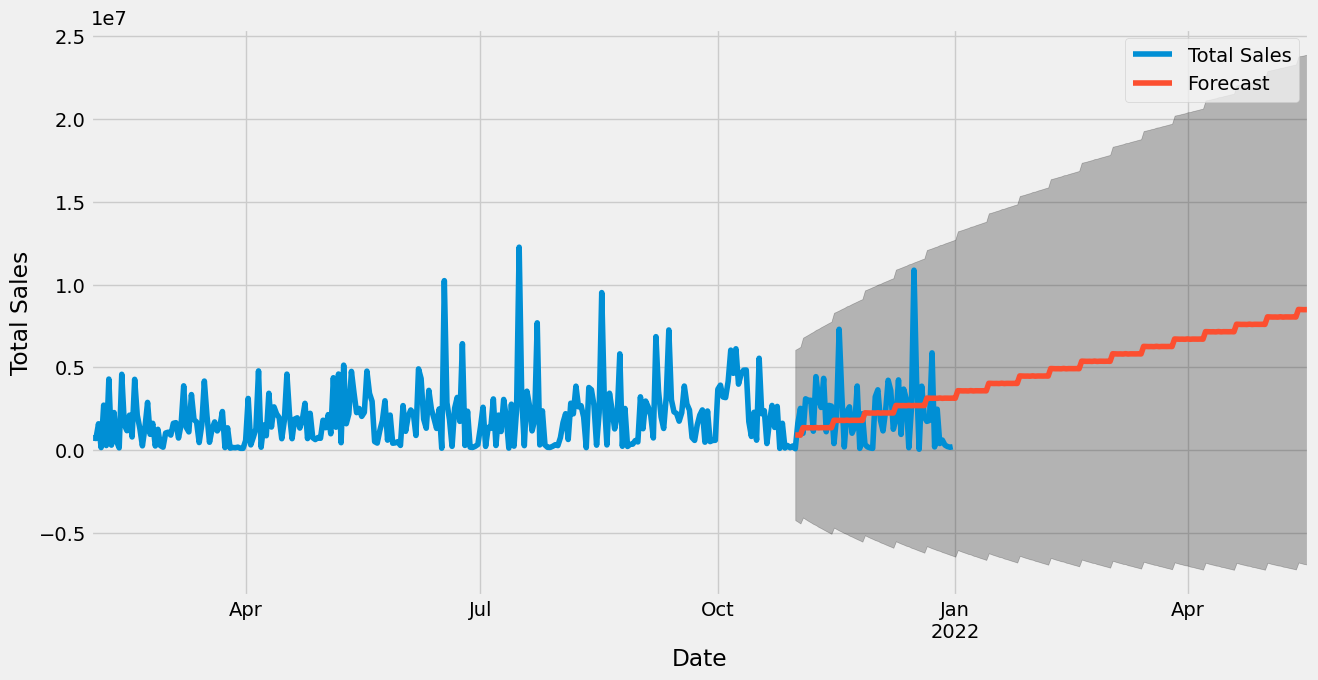

In [31]:
pred_uc = results.get_forecast(steps=200)
pred_ci = pred_uc.conf_int()
ax = df['2021-01-31':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

In [34]:
df['SMA30'] = df['Total Sales'].rolling(30).mean()
df['CMA30'] = df['Total Sales'].expanding().mean()
df['EWMA30'] = df['Total Sales'].ewm(span=60).mean()
 
df.dropna(inplace=True)

<AxesSubplot: xlabel='Invoice Date'>

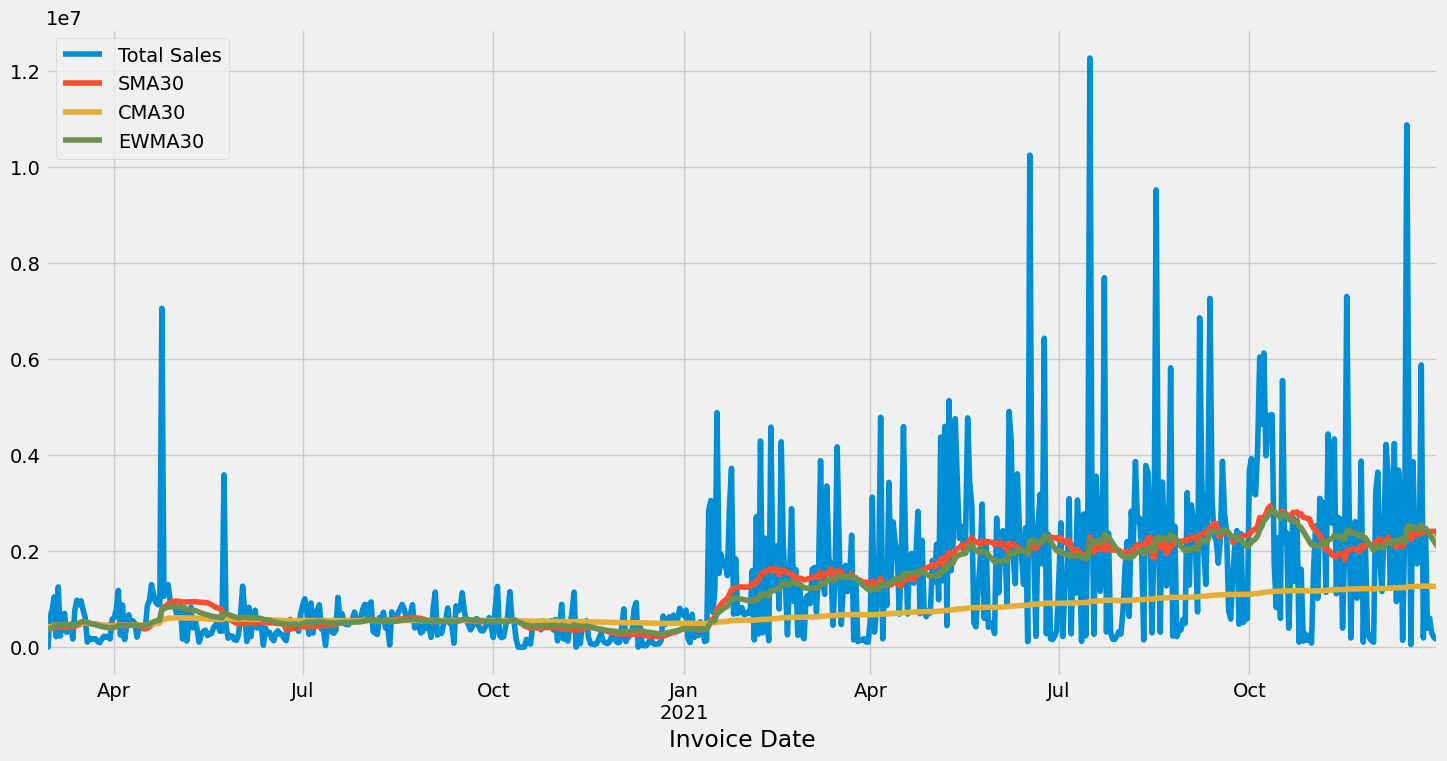

In [35]:
df[['Total Sales', 'SMA30', 'CMA30', 'EWMA30']].plot(label='data', figsize=(16, 8))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bfed6266-e13a-4d2e-9f39-a19e24bed1c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>